In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn import svm



In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


### Check for nan and missing values

In [4]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
len(data)

119390

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## finding unique item

In [7]:
unique_meal = data['meal'].unique()
count_unique_meal = data['meal'].value_counts()
count_unique_meal

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [8]:
unique_arrival_date_month = data['arrival_date_month'].unique()
count_arrival_date_month = data['arrival_date_month'].unique()
count_arrival_date_month



array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

### Data cleaning

In [9]:
nan_replacement = {'children':0,'country':'unknown','agent':0,'company':0}
full_data_clean = data.fillna(nan_replacement)
full_data_clean.dropna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,07-09-2017


In [67]:
full_data_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [69]:
full_data_clean['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

### Cancellation per month

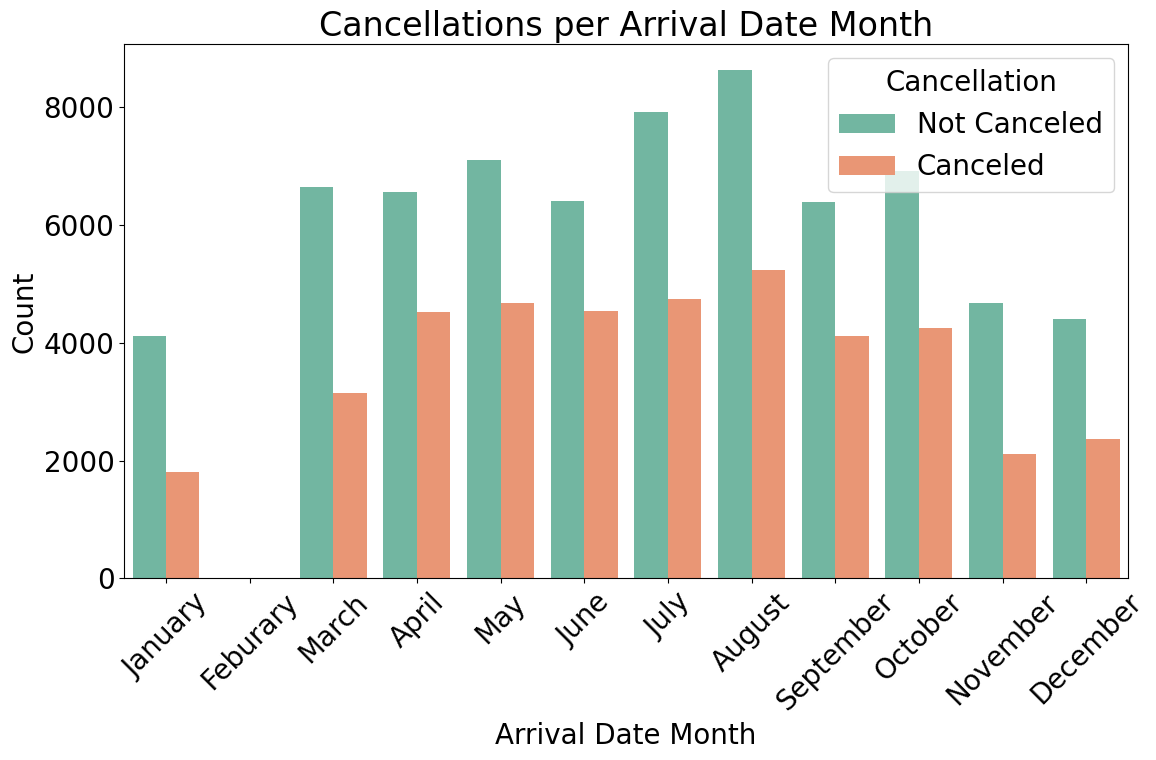

In [70]:
# Create a count plot
plt.figure(figsize=(12, 8))
sb.countplot(data=full_data_clean, x='arrival_date_month', hue='is_canceled', palette='Set2',order=['January', 'Feburary', 'March', 'April','May','June','July','August','September','October','November','December'])
plt.xlabel('Arrival Date Month')
plt.ylabel('Count')
plt.title('Cancellations per Arrival Date Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.show()


### Cancelled by repeated coustomers

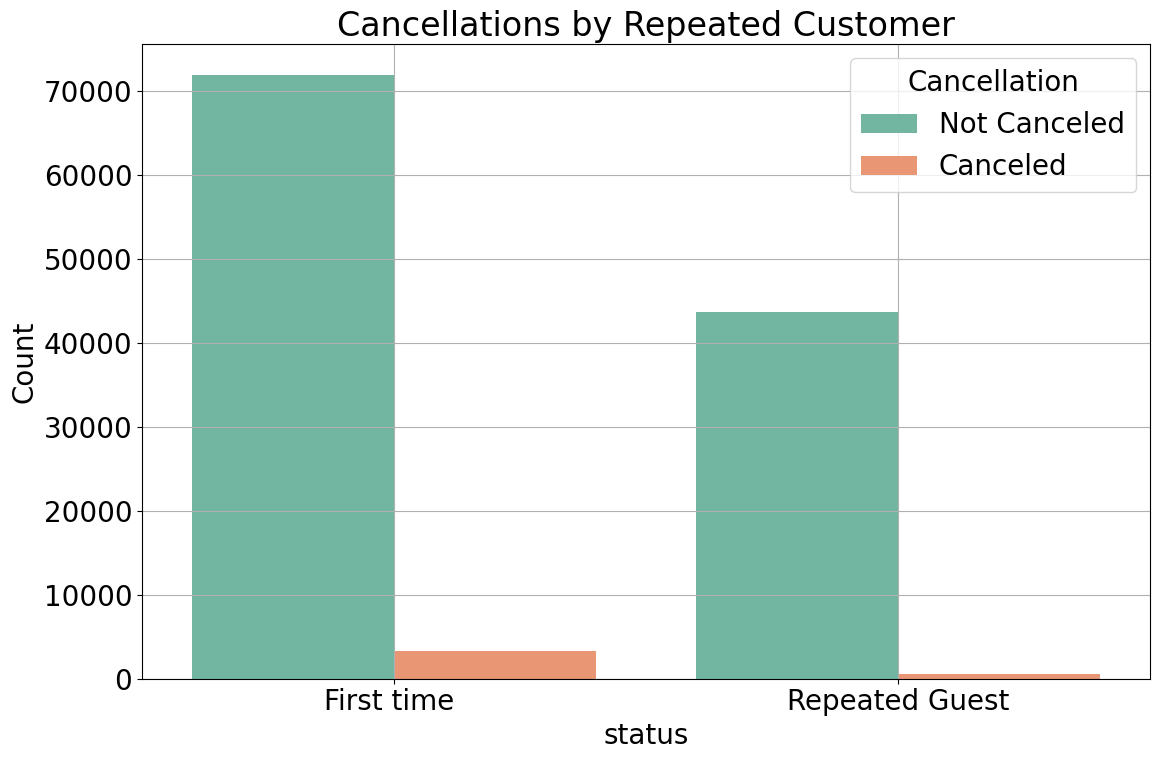

In [71]:
# Create a count plot
plt.figure(figsize=(12, 8))
ax = sb.countplot(data=full_data_clean, x='is_canceled', hue='is_repeated_guest', palette='Set2')
plt.xlabel('status',fontsize=20)
plt.ylabel('Count')
plt.title('Cancellations by Repeated Customer')
labels = ('First time ','Repeated Guest')
ax.set_xticklabels(labels,fontsize=20)
plt.tight_layout()
plt.grid()
plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])

plt.show()


In [72]:
# check for unique countries
country_unique = full_data_clean['country'].unique().tolist()
len(country_unique)



# Total 178 countries

178

In [73]:
# check for unique data of country 
county_unique_value_count =full_data_clean['country'].value_counts().to_dict()
county_unique_value_count
def getList(category_frequency): 
    list = [] 
    for value in category_frequency.values(): 
        list.append(value) 
          
    return list

country_count = getList(county_unique_value_count) 
# this is to return list of values obtained in dictionary
country_count

[48590,
 12129,
 10415,
 8568,
 7287,
 3766,
 3375,
 2342,
 2224,
 2104,
 2097,
 1730,
 1279,
 1263,
 1024,
 999,
 919,
 669,
 632,
 607,
 500,
 488,
 447,
 435,
 426,
 362,
 287,
 259,
 248,
 230,
 214,
 197,
 171,
 152,
 133,
 128,
 103,
 101,
 100,
 85,
 83,
 83,
 81,
 80,
 75,
 74,
 71,
 68,
 67,
 65,
 65,
 59,
 57,
 57,
 55,
 51,
 51,
 51,
 48,
 40,
 39,
 39,
 35,
 34,
 32,
 32,
 31,
 29,
 29,
 28,
 27,
 26,
 26,
 24,
 22,
 21,
 19,
 19,
 18,
 18,
 18,
 17,
 16,
 16,
 15,
 14,
 14,
 14,
 13,
 12,
 12,
 12,
 12,
 11,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [79]:
# get number of acutal guests by country
country_data = pd.DataFrame(full_data_clean[full_data_clean["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

### Most Busy month

In [96]:
arrival_date_month_value = full_data_clean['arrival_date_month'].value_counts()
arrival_date_month_value

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

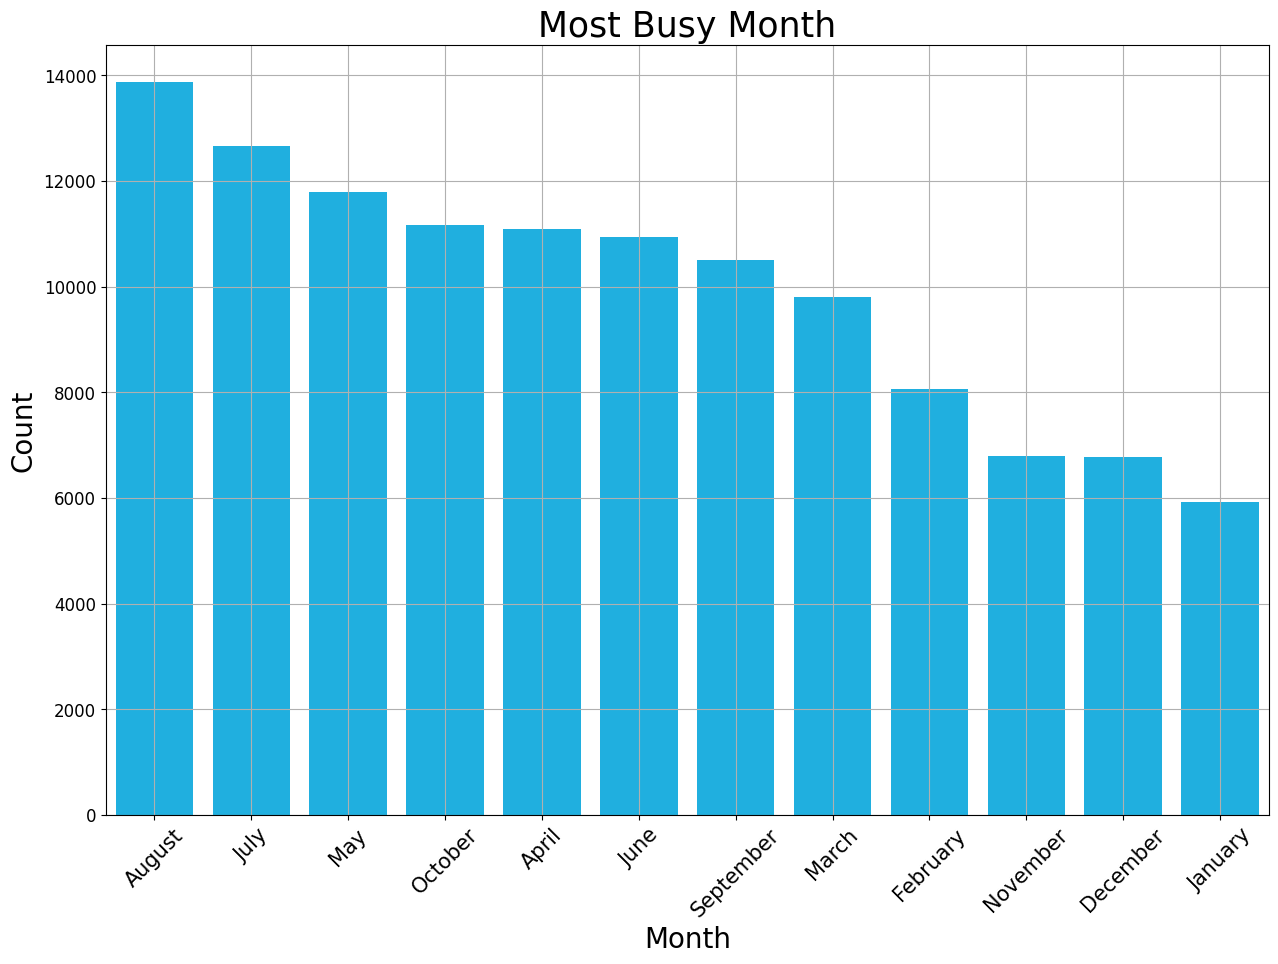

In [117]:
plt.figure(figsize=(15,10))
ax = sb.countplot(data=full_data_clean,x ='arrival_date_month',color='deepskyblue',order=arrival_date_month_value.index)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.title('Most Busy Month',fontsize=25)
plt.grid()



plt.show()

## Feature Engineering

In [123]:
object_columns = []

# Iterate over column names and their dtypes using the .dtypes attribute
for column, dtype in full_data_clean.dtypes.items():
    if dtype == 'object':
        object_columns.append(column)

object_columns

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [124]:
labelencoder = LabelEncoder()
def conversion_obj(n):
    for i in n:
        full_data_clean[i] = labelencoder.fit_transform(full_data_clean[i])


conversion_obj(object_columns)        

In [125]:
full_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int32  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [126]:
full_data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,0.0,0.0,0,2,0.0,0,0,1,15
1,1,0,737,2015,5,27,1,0,0,2,...,0,0.0,0.0,0,2,0.0,0,0,1,15
2,1,0,7,2015,5,27,1,0,1,1,...,0,0.0,0.0,0,2,75.0,0,0,1,46
3,1,0,13,2015,5,27,1,0,1,1,...,0,304.0,0.0,0,2,75.0,0,0,1,46
4,1,0,14,2015,5,27,1,0,2,2,...,0,240.0,0.0,0,2,98.0,0,1,1,76


In [127]:
full_data_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### As data is cleaned and transform to numerical lets export the csv file

In [130]:
full_data_clean.to_excel(r'clean_data.xlsx',index=False)

In [132]:
data = pd.read_excel('clean_data.xlsx')

In [133]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,0,0,0,2,0.0,0,0,1,15
1,1,0,737,2015,5,27,1,0,0,2,...,0,0,0,0,2,0.0,0,0,1,15
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,46
3,1,0,13,2015,5,27,1,0,1,1,...,0,304,0,0,2,75.0,0,0,1,46
4,1,0,14,2015,5,27,1,0,2,2,...,0,240,0,0,2,98.0,0,1,1,76


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [144]:
X = data.drop('is_canceled',axis=1)
X[:10]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,342,2015,5,27,1,0,0,2,0,...,0,0,0,0,2,0.0,0,0,1,15
1,1,737,2015,5,27,1,0,0,2,0,...,0,0,0,0,2,0.0,0,0,1,15
2,1,7,2015,5,27,1,0,1,1,0,...,0,0,0,0,2,75.0,0,0,1,46
3,1,13,2015,5,27,1,0,1,1,0,...,0,304,0,0,2,75.0,0,0,1,46
4,1,14,2015,5,27,1,0,2,2,0,...,0,240,0,0,2,98.0,0,1,1,76
5,1,14,2015,5,27,1,0,2,2,0,...,0,240,0,0,2,98.0,0,1,1,76
6,1,0,2015,5,27,1,0,2,2,0,...,0,0,0,0,2,107.0,0,0,1,76
7,1,9,2015,5,27,1,0,2,2,0,...,0,303,0,0,2,103.0,0,1,1,76
8,1,85,2015,5,27,1,0,3,2,0,...,0,240,0,0,2,82.0,0,1,0,165
9,1,75,2015,5,27,1,0,3,2,0,...,0,15,0,0,2,105.5,0,0,0,646


In [146]:
y = data['is_canceled']
y[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    1
Name: is_canceled, dtype: int64

In [169]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=42)


In [170]:
for i in range(10):
    print(x_train,y_train)

        hotel  lead_time  arrival_date_year  arrival_date_month  \
81059       0         85               2016                   4   
95780       0        125               2016                   1   
106249      0         25               2017                   3   
32165       1         40               2017                   4   
26615       1         12               2016                   1   
...       ...        ...                ...                 ...   
76820       0          2               2016                   5   
110268      0         91               2017                   0   
103694      0         74               2016                   2   
860         1        130               2015                   1   
15795       1         16               2015                   5   

        arrival_date_week_number  arrival_date_day_of_month  \
81059                          4                         22   
95780                         34                         20   
106249

In [171]:
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (35817, 31)
Shape of X_test: (83573, 31)
Shape of y_train: (35817,)
Shape of y_test: (83573,)


In [172]:
def model_selection(x,y):
    lr = LogisticRegression().fit(x,y)
    rfc = RandomForestClassifier().fit(x,y)
    gnb = GaussianNB().fit(x,y)
    knn = neighbors.KNeighborsClassifier().fit(x,y)
    svm_model = svm.SVC(kernel='linear').fit(x,y)
    gbc = GradientBoostingClassifier().fit(x,y)

    models = {
        'Logistic Regression': lr,
        'Random Forest': rfc,
        'Gaussian Naive Bayes': gnb,
        'K-Nearest Neighbors': knn,
        'SVM': svm_model,
        'Gradient Boosting': gbc
    }

    return models 

trained_model = model_selection(x_train,y_train)    

c:\Users\Amit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [173]:
# Put models in dicionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN":neighbors.KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gaussian Naive Bayes":GaussianNB(),
          "SVM":svm.SVC(kernel='linear'),
          "Gradient Boosting":GradientBoostingClassifier()}

# see for example here name = KNN and model =KNeighborsClassifier()

# Create function to fit and score model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluate given ml model
    models: a dictionary of different scilit-learn machine learning models
    x_train : training data
    x_test : testing data
    """
    # set up random seed
    # np.random.seed(42)
    # Make a dicitionary to keep models
    model_score = {}
    # Loop through models
    for name, model in models.items():
        #Fit the model to data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_score
        model_score[name]=model.score(X_test,y_test)
    return model_score

In [174]:
model_score = fit_and_score(models=models,
                           X_train=x_train,
                           X_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
model_score

c:\Users\Amit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



AttributeError: 'Flags' object has no attribute 'c_contiguous'